**Nama : Paramita Citra Indah Mulia**

In [2]:
#import modul yang akan digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
from sklearn.model_selection import train_test_split

In [3]:
#mengecek versi tensorflow
print(tf.__version__)

2.5.0


In [4]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-14 11:40:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.61MB/s    in 33s     

2021-07-14 11:41:32 (9.21 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
#mengesktrak file
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('/')
    zip_ref.close()
    
#mendefinisikan dan melihat isi folder
base_dir = '/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [6]:
#remove folder yang tidak perlu
z = os.listdir(base_dir)
z.remove('README_rpc-cv-images.txt')
z

['rock', 'scissors', 'paper']

In [7]:
#menyiapkan folder untuk masing-masing kategori
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [8]:
#melihat jumlah masing-masing data pada kategori
print(len(os.listdir(base_dir+'/rock')))
print(len(os.listdir(base_dir+'/paper')))
print(len(os.listdir(base_dir+'/scissors')))

726
712
750


In [9]:
#membuat folder untuk data training dan validasi
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
#memecah masing-masing kategori menjadi data training dan data validasi
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [11]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [12]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [13]:
# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [14]:
# menyalin data training dan data validasi ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [15]:
#mengecek jumlah data training pada masing-masing kategori
print(len(os.listdir(base_dir+'/train/rock')))
print(len(os.listdir(base_dir+'/train//paper')))
print(len(os.listdir(base_dir+'/train/scissors')))


435
427
450


In [16]:
#mengecek jumlah data validasi pada masing-masing kategori
print(len(os.listdir(base_dir+'/val/rock')))
print(len(os.listdir(base_dir+'/val/paper')))
print(len(os.listdir(base_dir+'/val/scissors')))

291
285
300


In [17]:
#melakukan augmentasi dengan image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [20]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

#melatih model
history = model.fit(train_generator,
                    steps_per_epoch = 4,
                    epochs = 25,
                    validation_data = validation_generator,
                    validation_steps = 4,
                    verbose = 2
                   )

Epoch 1/25
4/4 - 11s - loss: 1.1609 - acc: 0.3047 - val_loss: 1.0993 - val_acc: 0.3984
Epoch 2/25
4/4 - 10s - loss: 1.1064 - acc: 0.2812 - val_loss: 1.0915 - val_acc: 0.5078
Epoch 3/25
4/4 - 10s - loss: 1.0993 - acc: 0.3594 - val_loss: 1.0784 - val_acc: 0.3750
Epoch 4/25
4/4 - 12s - loss: 1.0801 - acc: 0.4453 - val_loss: 1.0532 - val_acc: 0.4062
Epoch 5/25
4/4 - 10s - loss: 0.9896 - acc: 0.5312 - val_loss: 0.8705 - val_acc: 0.6250
Epoch 6/25
4/4 - 10s - loss: 0.9848 - acc: 0.5391 - val_loss: 0.8243 - val_acc: 0.7109
Epoch 7/25
4/4 - 10s - loss: 1.0105 - acc: 0.6094 - val_loss: 0.7477 - val_acc: 0.7656
Epoch 8/25
4/4 - 10s - loss: 0.8561 - acc: 0.5859 - val_loss: 0.8521 - val_acc: 0.6562
Epoch 9/25
4/4 - 10s - loss: 0.7126 - acc: 0.7891 - val_loss: 0.5925 - val_acc: 0.8672
Epoch 10/25
4/4 - 10s - loss: 0.6089 - acc: 0.7891 - val_loss: 0.5055 - val_acc: 0.8125
Epoch 11/25
4/4 - 10s - loss: 0.4956 - acc: 0.8203 - val_loss: 0.4218 - val_acc: 0.7969
Epoch 12/25
4/4 - 10s - loss: 0.4191 - ac

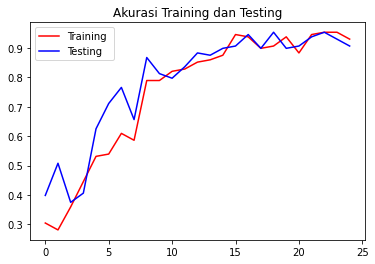

<Figure size 432x288 with 0 Axes>

In [29]:
#visualisasi akurasi data training dan Validasi
import matplotlib.pyplot as plt                                                   
acc = history.history['acc']                                               
val_acc = history.history['val_acc']                                        
loss = history.history['loss']                                                   
val_loss = history.history['val_loss']                                           

epochs = range(len(acc))                                                         

plt.plot(epochs, acc, 'r', label='Training ')                                                
plt.plot(epochs, val_acc, 'b', label='Validasi')                         
plt.title('Akurasi Training dan Validasi')                                      
plt.legend(loc=0)                                                               
plt.figure()                                                                      
plt.show()

Saving WhatsApp Image 2021-07-14 at 18.57.03.jpeg to WhatsApp Image 2021-07-14 at 18.57.03 (1).jpeg
WhatsApp Image 2021-07-14 at 18.57.03.jpeg
SCISSORS


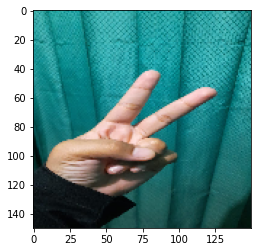

In [27]:
#simulasi model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')